# House Price Prediction
*Inspired by [COMPREHENSIVE DATA EXPLORATION WITH PYTHON](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)*

# 0. Setting

### Import Libraries

In [42]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Visuzliation Setting

In [43]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
from matplotlib import colors
import seaborn as sns

In [44]:
color_palette = 'Set3'
title_size = 20
sns.set_style("whitegrid")

# 1. Acquire Data
Acquire training and testing datasets into Pandas **DataFrames**

In [46]:
root = os.path.join(os.getcwd(), 'DATA')

In [47]:
df_train = pd.read_csv(os.path.join(root, 'house_price_prediction_train.csv'))

# 2. Analyze Data

In [60]:
print(df_train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


- 81 features, 1 target
- 1460 data

## SalePrice

In [51]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

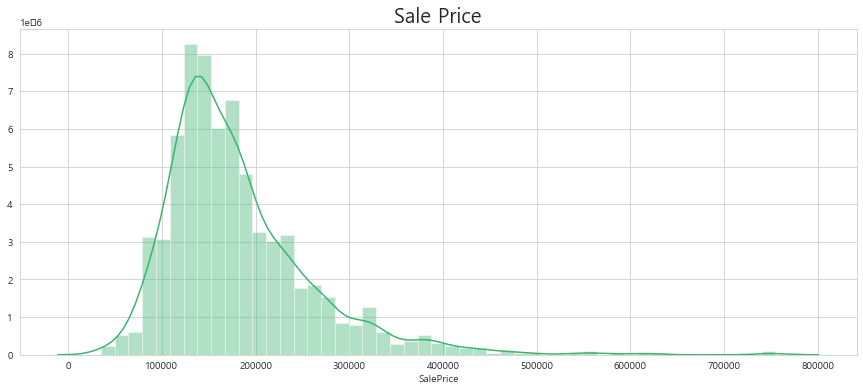

In [69]:
plt.figure(figsize=(15,6))
sns.distplot(df_train['SalePrice'], color='mediumseagreen')
plt.title("Sale Price",fontsize=title_size)
plt.show()

## Numerical Values - GrLivArea
GrLivArea()라는 변수와 target 값과의 상관관계를 시각적으로 파악해보자

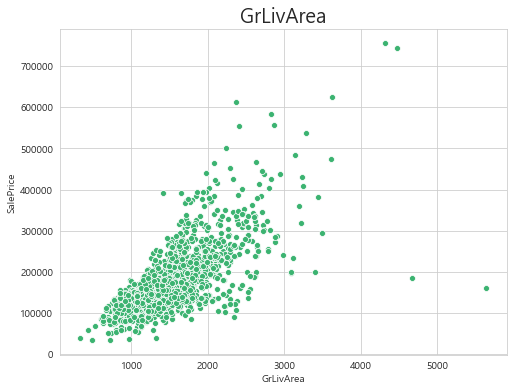

In [70]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train, color='mediumseagreen')
plt.title("GrLivArea",fontsize=title_size)
plt.show()

**양의 상관관계**가 있음을 유추할 수 있다

## Numerical Values - TotalBsmtSF
마찬가지로 진행 가능

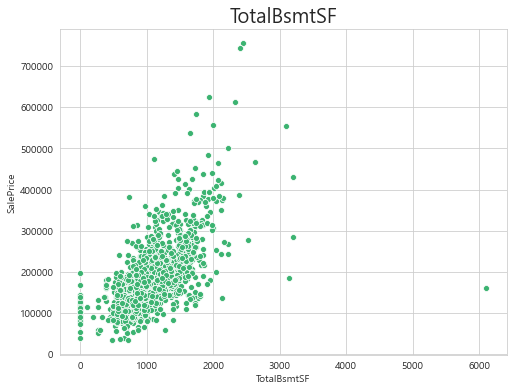

In [80]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df_train, color='mediumseagreen')
plt.title("TotalBsmtSF",fontsize=title_size)
plt.show()

**강한 양의 상관관계**가 있음을 유추할 수 있다

## Categorical Values - OverallQual

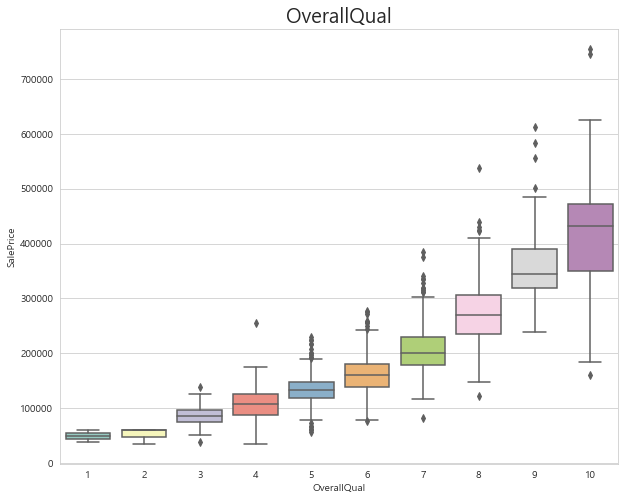

In [77]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_train, palette=color_palette)
plt.title('OverallQual', fontsize=title_size)
plt.show()

어느정도 **양의 상관관계**가 있음을 유추할 수 있다

## Categorical Values - YearBuilt

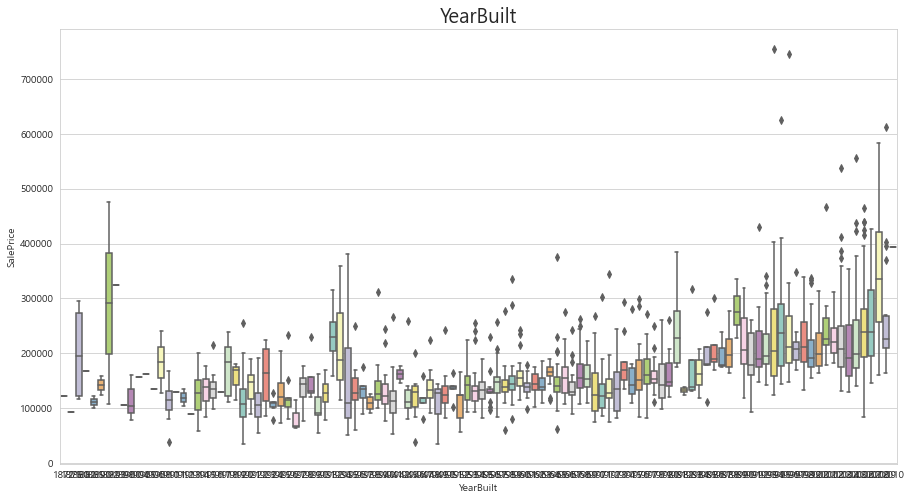

In [79]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='YearBuilt', y='SalePrice', data=df_train, palette=color_palette)
plt.title('YearBuilt', fontsize=title_size)
plt.show()

**약한 양의 상관관계**가 있음을 유추할 수 있으나, *SalePrice* 변수가 물가 상승의 영향을 고려한 수치인지 알 수 없기 때문에 단언할 수 없다

## Correlation Analysis
더 자세한 상관관계 분석을 통해 수치적으로 SalePrice와의 상관 관계를 파악해보자

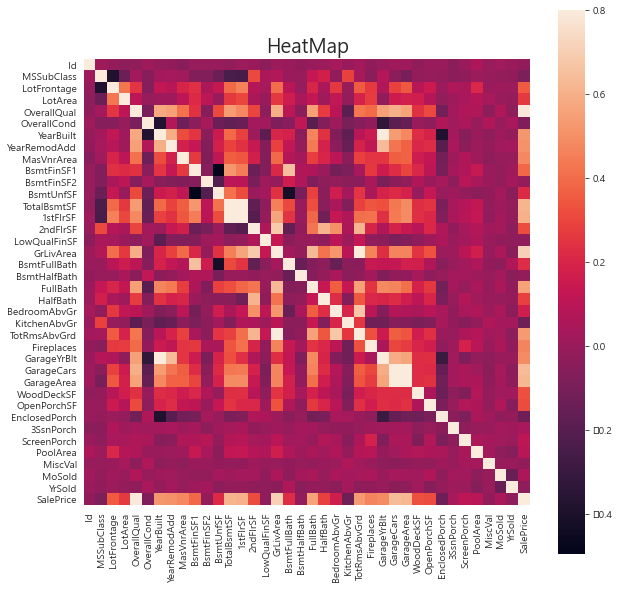

In [83]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_train.corr(), vmax=.8, square=True)
plt.title('HeatMap', fontsize=title_size)
plt.show()

우선 모든 변수 간 상관관계를 살펴보면, 서로 간 상관계수가 굉장히 큰 변수들을 확인할 수 있다
- TotalBsmtSF & 1stFlrSF
- GarageCars & GarageArea
- GaraeYrBlt & YearBuilt
이들은 다중공선성(multicollinearity) 문제를 일으킬 수 있기에 주의해야할 것이다


또한, HeatMap 에서 SalePrice와의 상관계수가 큰 변수를 뽑을 수 있다
- GrLivArea
- TotalBsmtSF
- OverallQual
위 변수들은 앞서 살펴봤던 만큼 직관적으로도 상관관계가 큰 변수들로 생각할 수 있는데,  
일정 값 이상의 상관계수를 가지고 있는 다른 변수들도 살펴보자

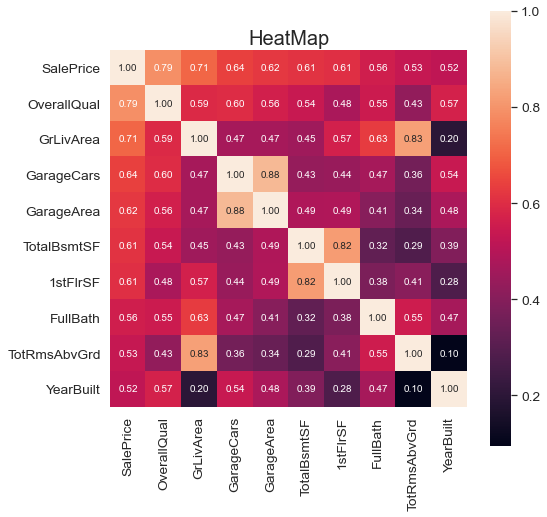

In [87]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
plt.figure(figsize=(8, 8))
plt.title('HeatMap', fontsize=title_size)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

확대한 HeatMap을 통해 SalePrice에 많은 영향을 미치고 있는 상위 10개의 변수를 확인했다
- OverallQual
- GrLivArea (TotRmsAbvGrd)
- TotalBsmtSF
- GarageCars (GarageArea)
- TotalBsmtSF (1stFloor)
- FullBath
- YearBuilt


위 변수들로 작업을 진행하는 것으로 결정

In [88]:
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

살펴보기로 한 변수들 간 ScatterPlot을 그려서 변수 간 관계를 조금 더 자세히 파악해봐야한다

**1. TotalBsmtSF 과 GrLiveArea**  
경계선이 있는 것 처럼 특이한 관계를 가지고 있다  
**2. SalePrice 과 YearBuilt**  
지수함수와 같은 관계가 있다

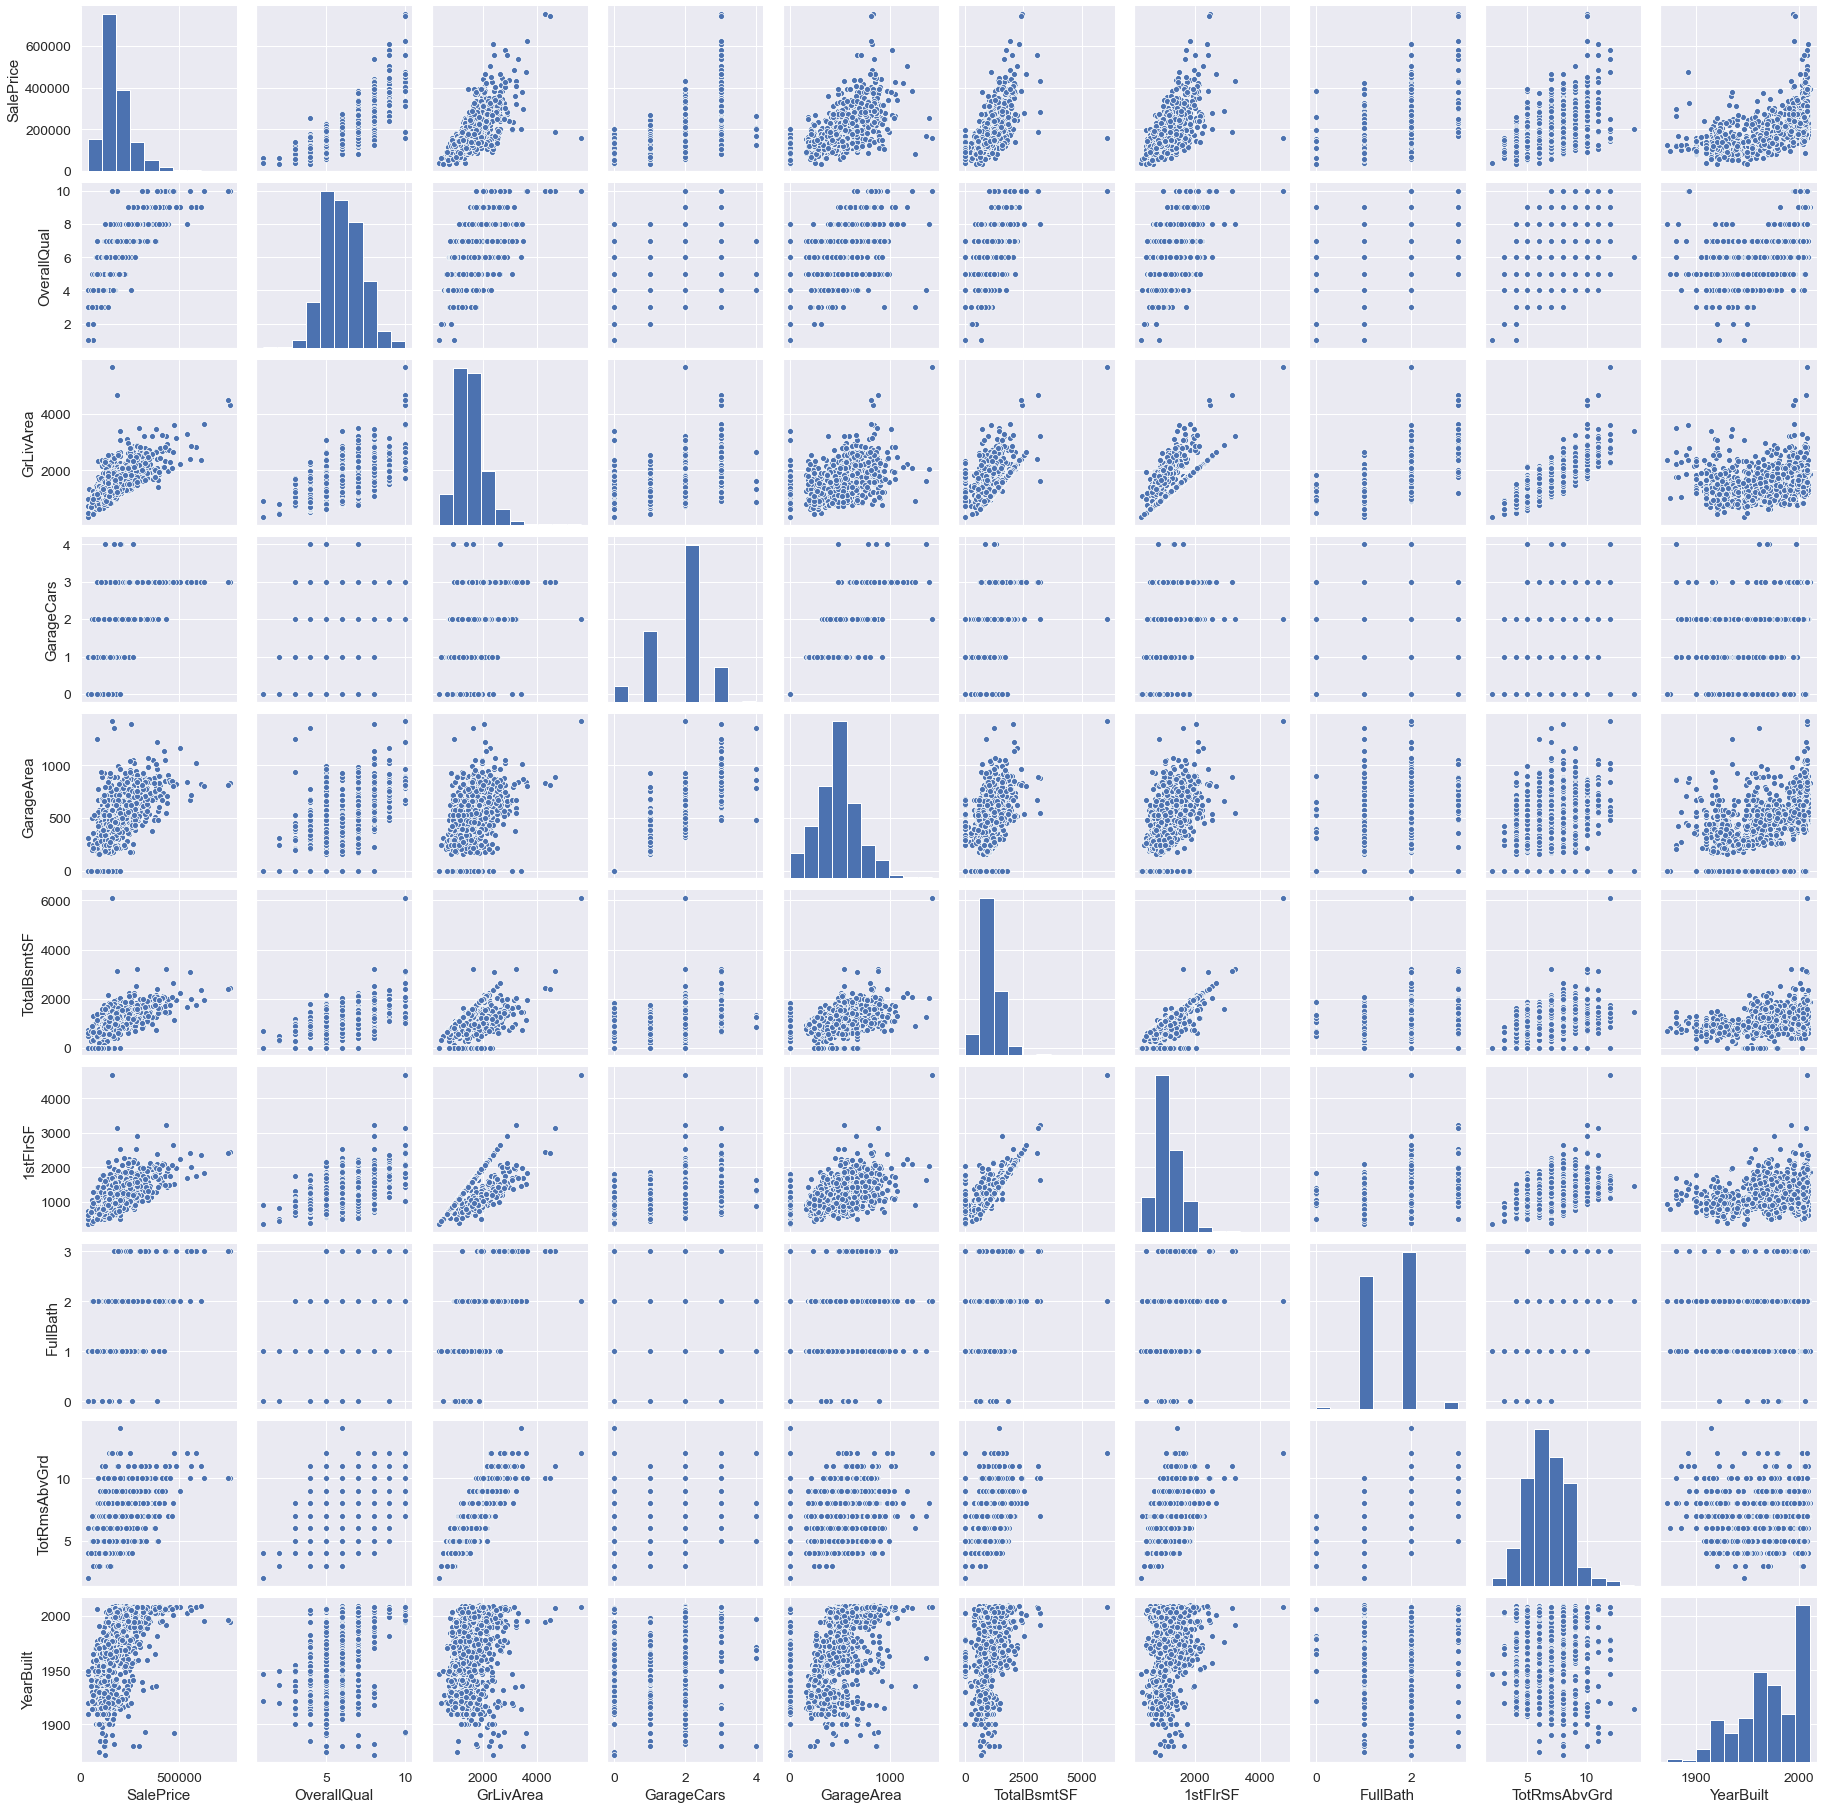

In [93]:
sns.pairplot(df_train[cols], size = 2.5)

# 3. Data Wrangling - Missing Data
Null 값을 가진 변수들이 존재한다면, 그 경향과 영향도를 파악해야한다  
Null 값의 빈도가 높은 20개의 변수들을 살펴보자

In [95]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


- 15% 이상의 비율이 null 인 경우, 따로 조치를 취하지 않고 변수를 삭제한다
    - 위 표에서 LotFrontage 까지는 삭제한다
- Garage과 관련된 변수들 5가지와 Bsmt와 관련된 변수 5가지는 1가지로 통합하여 생각한다
- MasVnrArea와 MasVnrType 변수는 YearBuilt와 OverallQual 변수와 높은 상관관계를 가지고 있으므로 삭제한다
- Electrical의 경우, null 값인 row 하나만 삭제하도록 한다

In [96]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

# 4. Data Wrangling - Outliers

## Univariate Analysis
Outlier라고 의심할 수 있는 기준을 만들기 위해 Data Standardization을 진행한다

In [106]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83714031]
 [-1.83197013]
 [-1.79940175]
 [-1.78179041]
 [-1.77298475]
 [-1.62203048]
 [-1.61574072]
 [-1.58429192]
 [-1.58429192]
 [-1.57180045]]

outer range (high) of the distribution:
[[3.82490259]
 [4.036704  ]
 [4.49161726]
 [4.70546914]
 [4.72535736]
 [5.05685293]
 [5.41818712]
 [5.58603569]
 [7.09557834]
 [7.22137356]]


- lower range에 있는 값들은 0과 가깝기 때문에 크게 신경 쓰지 않아도 된다
- higher range에 있는 값들은 굉장히 큰 경우가 있으며, 특히 7 이상의 값 2개는 주의를 요한다

## Bivariate Analysis
앞선 GrLivArea의 Scatterplot 을 다시 살펴보자

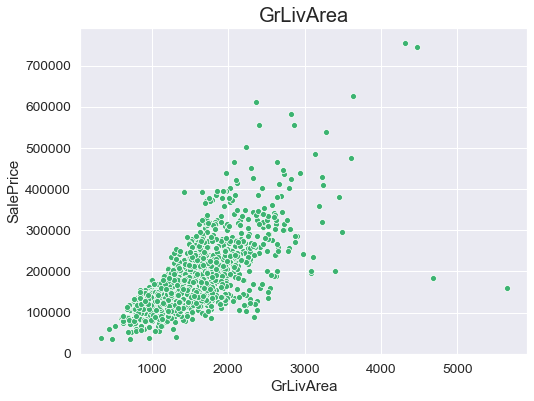

In [97]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train, color='mediumseagreen')
plt.title("GrLivArea",fontsize=title_size)
plt.show()

- GrLivArea가 유난히 큰데, SalePrice는 낮은 값 두 개가 있다
- 이들은 OutLier이므로 삭제한다

In [103]:
df_train.drop(df_train[df_train.GrLivArea > 4500].index, inplace=True)

마찬가지로 TotalBsmtSF 변수의 ScatterPlot도 다시 살펴보자

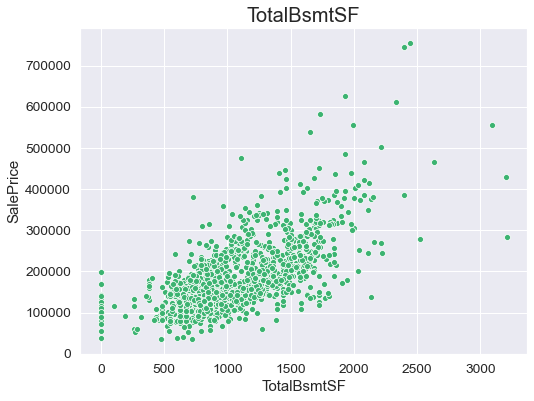

In [105]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df_train, color='mediumseagreen')
plt.title("TotalBsmtSF",fontsize=title_size)
plt.show()

- 크게 outlier라고 의심될 만큼 경향성을 벗어난 값들이 없다

# 5. Data Wrangling - Standardization

## Normality
데이터의 분포가 정규 분포를 따라야 한다  

### SalePrice
SalePrice 변수가 정규 분포를 따르는지 확인해본다  

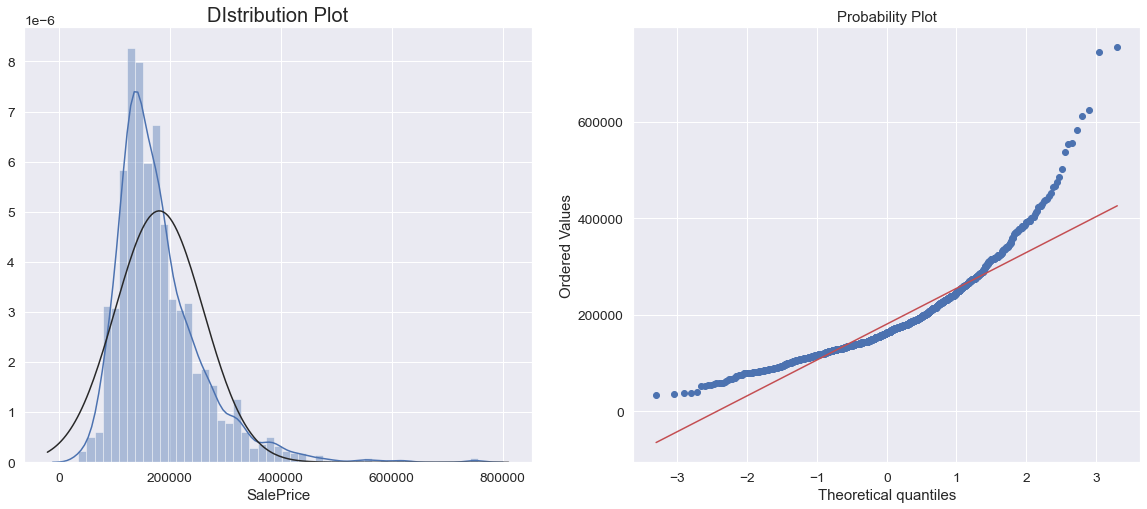

In [113]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.title('DIstribution Plot', fontsize=title_size)
sns.distplot(df_train['SalePrice'], fit=norm);

plt.subplot(1, 2, 2)
plt.title('Probability Plot', fontsize=title_size)
stats.probplot(df_train['SalePrice'], plot=plt)

plt.show()

- peakedness
- positive skewness
- does not follow the diagonal line

Log Transformation을 진행하여 위 문제들을 해결해보자

In [114]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

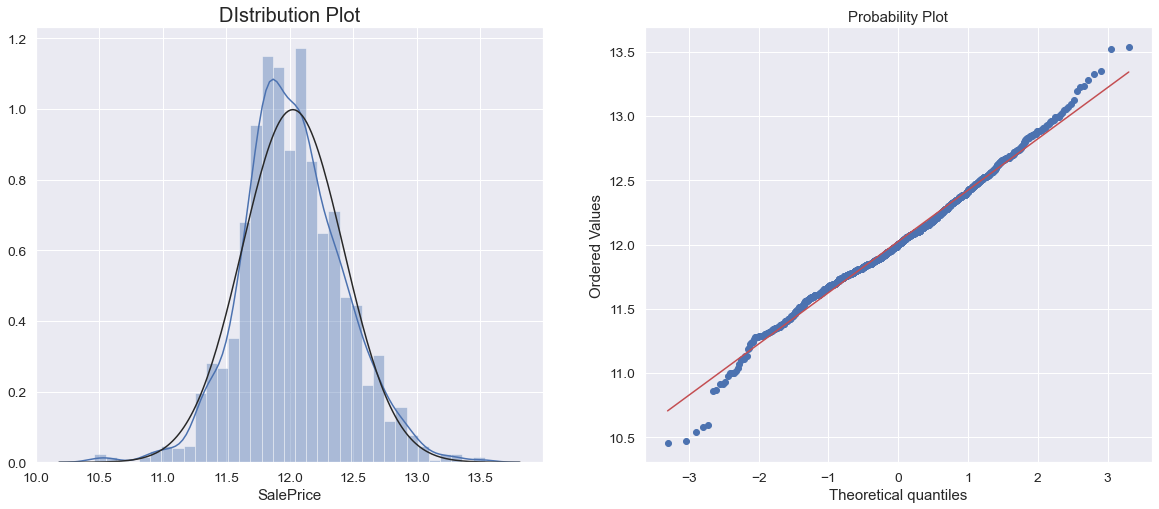

In [115]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.title('DIstribution Plot', fontsize=title_size)
sns.distplot(df_train['SalePrice'], fit=norm);

plt.subplot(1, 2, 2)
plt.title('Probability Plot', fontsize=title_size)
stats.probplot(df_train['SalePrice'], plot=plt)

plt.show()

### GrLivArea

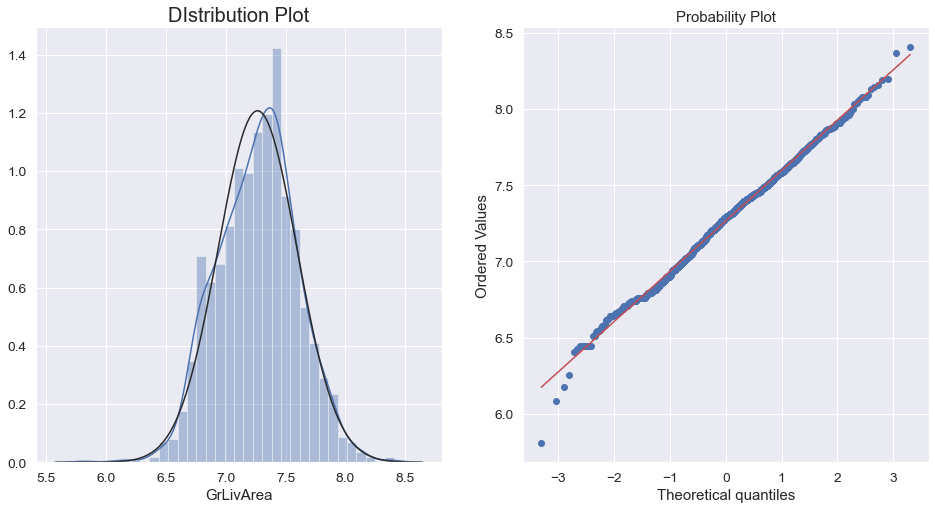

In [124]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.title('DIstribution Plot', fontsize=title_size)
sns.distplot(df_train['GrLivArea'], fit=norm);

plt.subplot(1, 2, 2)
plt.title('Probability Plot', fontsize=title_size)
stats.probplot(df_train['GrLivArea'], plot=plt)

plt.show()

같은 방법으로 data transfomation을 진행한다

In [117]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

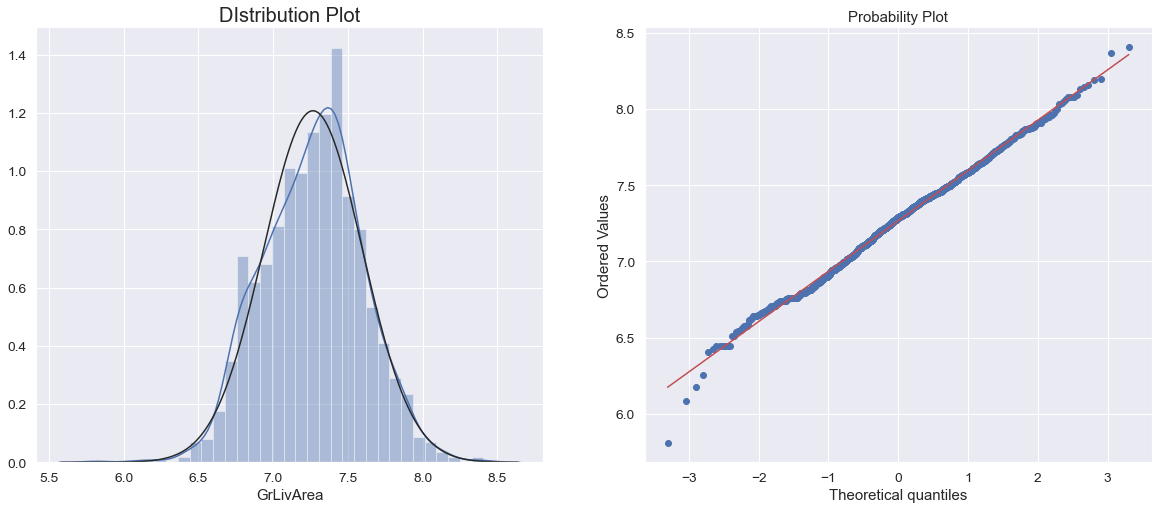

In [129]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.title('DIstribution Plot', fontsize=title_size)
sns.distplot(df_train['GrLivArea'], fit=norm);

plt.subplot(1, 2, 2)
plt.title('Probability Plot', fontsize=title_size)
stats.probplot(df_train['GrLivArea'], plot=plt)

plt.show()

### TotalBsmtSF

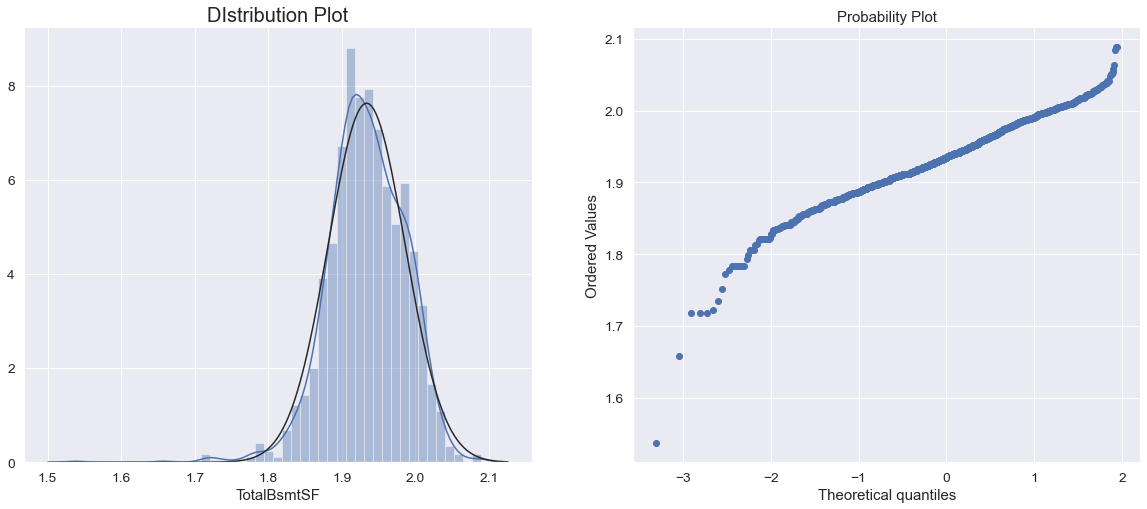

In [128]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.title('DIstribution Plot', fontsize=title_size)
sns.distplot(df_train['TotalBsmtSF'], fit=norm);

plt.subplot(1, 2, 2)
plt.title('Probability Plot', fontsize=title_size)
stats.probplot(df_train['TotalBsmtSF'], plot=plt)

plt.show()

- skewness
- 0인 데이터가 많음 (basement가 없는 집이 다수)
- 0에 대해서는 log transformation을 할 수 없음

따라서 지하가 없는 경우 0, 있는 경우는 1이 값을 가지는 새로운 binary variable **HasBmt**를 생성하자

In [130]:
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF'] > 0,'HasBsmt'] = 1

이제 이 변수에 대한 Log Transformation을 진행하는데, 0일 경우는 제외하고 진행한다

In [131]:
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

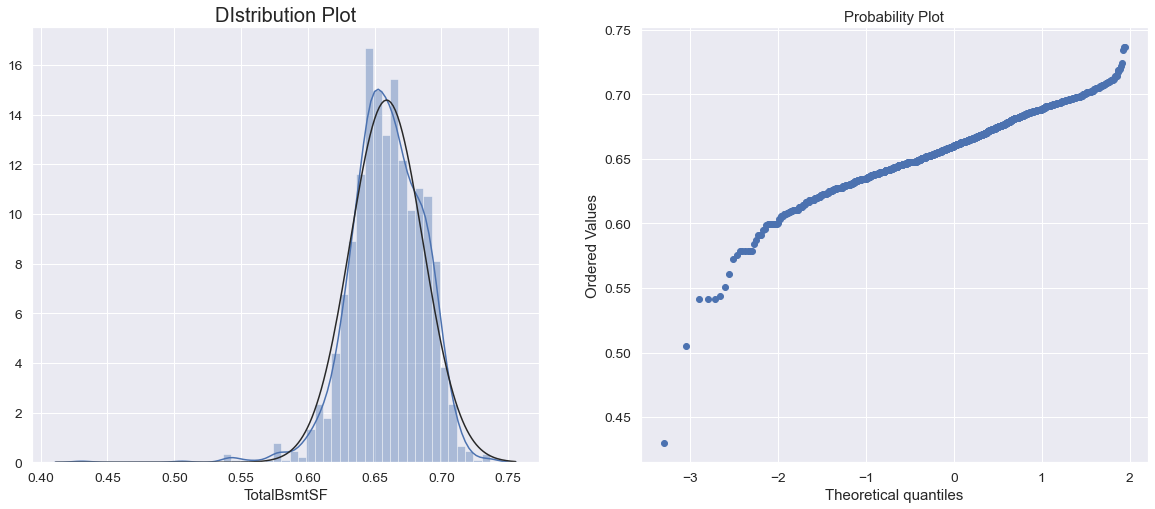

In [132]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.title('DIstribution Plot', fontsize=title_size)
sns.distplot(df_train['TotalBsmtSF'], fit=norm);

plt.subplot(1, 2, 2)
plt.title('Probability Plot', fontsize=title_size)
stats.probplot(df_train['TotalBsmtSF'], plot=plt)

plt.show()

## Homoscedasticity
데이터의 변수 간 분포가 비슷해야 한다

### GrLivArea & SalePrice

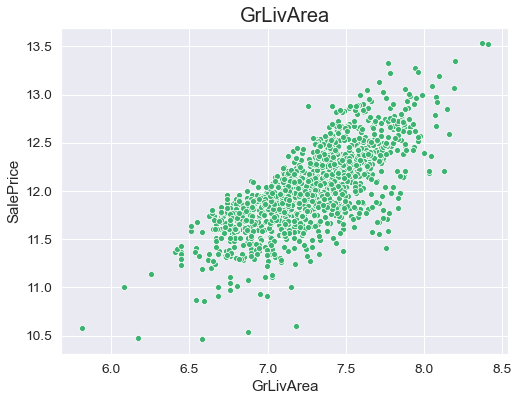

In [133]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train, color='mediumseagreen')
plt.title("GrLivArea",fontsize=title_size)
plt.show()

가장 처음에 그렸던 같은 그래프와 비교했을 때, 훨씬 더 균일한 분포를 확인할 수 있다  
("콘" 모양이 아니다)  
이는 Log Transformation에 의한 것이다

### TotalBsmtSF & SalePrice

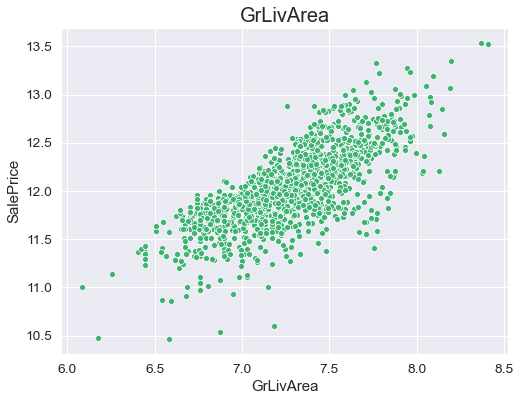

In [135]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train[df_train['TotalBsmtSF'] > 0], color='mediumseagreen')
plt.title("GrLivArea",fontsize=title_size)
plt.show()

마찬가지로, 균일한 분포를 확인할 수 있다

## Linearity
데이터의 경향이 선형이어야 하며, 그렇지 않을 경우 변수 변형을 통해 선형성을 가지도록 해야한다  
해당 데이터는 ScatterPLot으로 살펴본 결과, 전부 선형을 띄고 있었기에 따로 변수 변형을 하지 않아도 된다

## Absence of correlated errors
오류 간 관계가 있을 경우 이를 설명해주는 변수를 추가해야한다

# 끝!